# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html= browser.html
html_soup = soup(html, 'html.parser')

In [8]:
# Extract all rows of data
#all_rows = html_soup.find_all("table", class_="table")
all_rows = html_soup.find_all("tr", class_="data-row")
all_rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [29]:
# Create an empty list
rows = []
# Loop through the scraped data to create a list of rows
#for row in all_rows:
 #   row_data = html_soup.find('tr', class_="data-row").text.strip()
  #  rows.append(row_data)
for row in all_rows:
    row_data = [td.text for td in row.find_all('td')]
    rows.append(row_data)

rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [30]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls' ,'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(rows, columns=column_names)


In [31]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [44]:
# Examine data type of each column
mars_df[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']].dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [45]:
# Change data types for data analysis

# Change data type of 'terrestrial_date' column to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Change data type of 'sol' column to int
mars_df['sol'] = mars_df['sol'].astype(int)

# Change data type of 'ls' column to float
mars_df['ls'] = mars_df['ls'].astype(int)

# Change data type of 'month' column to int
mars_df['month'] = mars_df['month'].astype(int)

# Change data type of 'min_temp' column to float
mars_df['min_temp'] = mars_df['min_temp'].astype(float)

# Change data type of 'pressure' column to float
mars_df['pressure'] = mars_df['pressure'].astype(float)


In [46]:
# Confirm type changes were successful by examining data types again
mars_df[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']].dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [72]:
# 1. How many months are there on Mars?
mars_months = mars_df.groupby('month')['terrestrial_date'].count()
mars_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: terrestrial_date, dtype: int64

In [70]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_df['month'].count()
martian_days

1867

In [68]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_df.groupby('month')['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

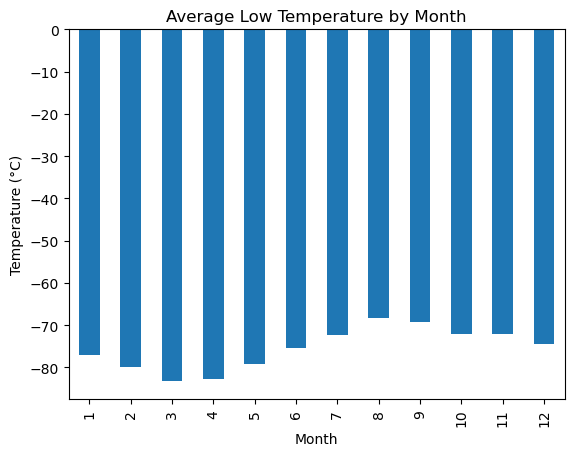

In [75]:
# Plot the average temperature by month
avg_low_temp.plot.bar()
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.show()

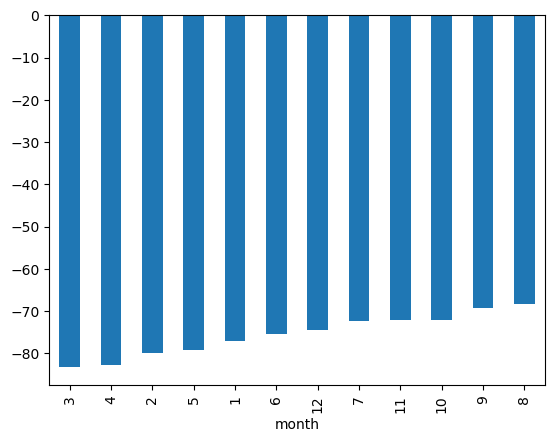

In [102]:
# Identify the coldest and hottest months in Curiosity's location
curiosity_temp = mars_df.groupby(['month'])['min_temp'].mean().sort_values()
curiosity_temp.plot.bar()
#coldest_month= mars_df.groupby(['month'])['min_temp'].max()
#hottest_month= mars_df.groupby(['month'])['min_temp'].min()
#curiosity_temp = mars_df.groupby('moth')['pressure']

#curiosity_temp.bar()
plt.show()



In [92]:
# 4. Average pressure by Martian month
avg_martian_pressure = mars_df.groupby(['month'])['pressure'].mean()
avg_martian_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

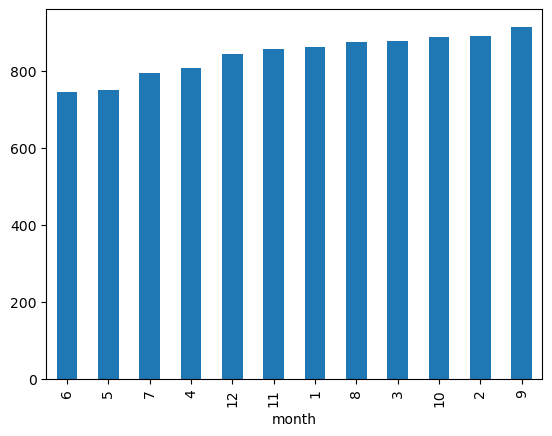

In [101]:
# Plot the average pressure by month
avg_pressure = mars_df.groupby(['month'])['pressure'].mean().sort_values()
avg_pressure.plot.bar()
plt.show

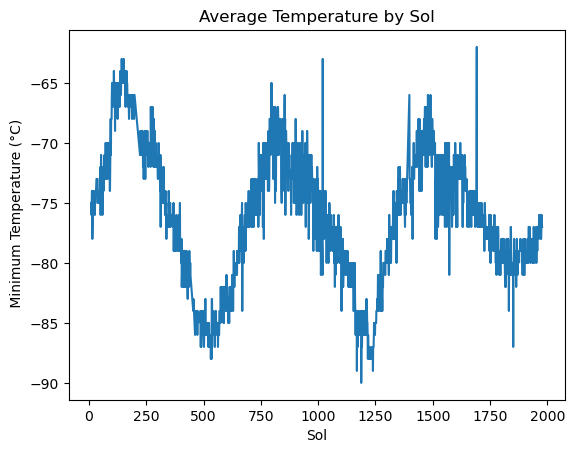

In [118]:
# 5. How many terrestrial (earth) days are there in a Martian year?
terrestrial_yr = mars_df.groupby(['sol'])['min_temp'].mean()
terrestrial_yr.plot.line()
plt.title('Average Temperature by Sol')
plt.xlabel('Sol')
plt.ylabel(' Minimum Temperature (°C)')
plt.show()

In [142]:
# SOL : the number of elapsed sols (Martian days) since Curiosity landed on Mars
#sol_range = mars_df['sol'].max() - mars_df['sol'].min()
#sol_range
min_sol = mars_df.groupby(['min_temp']).value_counts()
min_sol.head(20)

min_temp  id    terrestrial_date  sol   ls   month  pressure
-90.0     1119  2015-12-09        1188  79   3      881.0       1
-89.0     1100  2015-11-20        1169  70   3      894.0       1
          1168  2016-01-31        1239  102  4      818.0       1
-88.0     468   2014-02-06        535   86   3      868.0       1
          464   2014-02-03        532   84   3      872.0       1
          1169  2016-01-29        1237  101  4      820.0       1
          1166  2016-01-26        1234  99   4      824.0       1
          1165  2016-01-27        1235  100  4      824.0       1
          1164  2016-01-24        1233  99   4      826.0       1
          1163  2016-01-23        1232  99   4      827.0       1
          1162  2016-01-22        1231  98   4      828.0       1
          1161  2016-01-21        1230  98   4      830.0       1
          1160  2016-01-20        1229  97   4      831.0       1
          1159  2016-01-19        1228  97   4      832.0       1
          1158 

## OBSERVATION
With the help of the visual line graph and the calculation for min-temperature value count, it indicates that the same temperature is repeated almost after 2 earth years.

For Instance, if we are to analyze 88 C, 
the first was in 2014-02-06 with Sol 535 and 
ended 2016-01-08 sol 1217. 
Meaning 1217-535 = 682 days. 

So in my opinion and bases on the graphe supported by this calculation, Martian year is around 682 days equal to Terrestrial days/ earth days.



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
mars_df.to_csv('mars_dataframe.csv', index=False)

In [21]:
browser.quit()